# new One - Dev started 1/12/2022


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sdmetrics.column_pairs import ContinuousKLDivergence, DiscreteKLDivergence
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import ndcg_score,label_ranking_loss,dcg_score,cohen_kappa_score,coverage_error
import shap
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score,max_error
from sklearn import preprocessing
import itertools
import scipy.stats as st
import random
import rbo
import random
from final_function import *
from textdistance import (levenshtein,damerau_levenshtein,jaro_winkler,jaccard,hamming,mlipns,gotoh,strcmp95,needleman_wunsch,smith_waterman,lcsseq,lcsstr,ratcliff_obershelp,sorensen,tversky,overlap,tanimoto,cosine,monge_elkan,bag)

In [2]:
#!pip install rbo
#https://github.com/changyaochen/rbo

In [3]:
###variables
continuous_values = [
    "Age",
    "trestbps",
    "chol",
    "thalach",
    "oldpeak"
]

cv = KFold(n_splits=10)

NA_REPLACE=["?"]

In [4]:
real_data=pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",sep=",",header=None)

cols=["Age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

NR_COLS=len(cols)
real_data.columns=cols
real_data.head(4)


,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0


In [5]:
synth_data=pd.read_csv("synth.csv",index_col=0).reset_index(drop=True)

synth_data.columns=["Age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
synth_data.head(4)

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,66,0,3,146,228,0,0,151,0,0.0,2,0.0,3.0,1
1,66,0,3,150,278,0,2,131,0,0.0,2,1.0,3.0,0
2,43,1,4,136,309,0,2,120,1,0.0,2,0.0,7.0,0
3,55,1,3,130,196,1,2,163,0,0.5,2,0.0,3.0,0


In [6]:
# categorical variables are aprehend by difference
categorical_values = real_data[real_data.columns.difference(continuous_values)].columns

In [7]:
for col in NA_REPLACE:
    synth_data.replace(col,np.nan,inplace=True)
    real_data.replace(col,np.nan,inplace=True)

In [8]:
def get_high_null(df):
    high_null_cols = []
    for column in df.columns:
        if df[column].isna().sum() / len(df) >= 0.8:
            # print(column,categoricaldf[column].isna().sum()/7743)
            high_null_cols.append(column)
    return high_null_cols


high_null = get_high_null(real_data)
real_data.drop(columns=high_null, inplace=True)

In [9]:
real_data = real_data[synth_data.columns]
synth_data = synth_data[real_data.columns]

In [10]:
continuous_values=[col for col in continuous_values if col in real_data.columns]
categorical_values=[col for col in categorical_values if col in real_data.columns]


In [11]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
x_cont=imp_mean.fit_transform(real_data[continuous_values])
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x_cat=imp_mean.fit_transform(real_data[categorical_values])
real_data[continuous_values]=pd.DataFrame(x_cont,columns=continuous_values)
real_data[categorical_values]=pd.DataFrame(x_cat,columns=categorical_values)

In [12]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
x_cont=imp_mean.fit_transform(synth_data[continuous_values])
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x_cat=imp_mean.fit_transform(synth_data[categorical_values])
synth_data[continuous_values]=pd.DataFrame(x_cont,columns=continuous_values)
synth_data[categorical_values]=pd.DataFrame(x_cat,columns=categorical_values)

In [13]:
# convert types
real_data[continuous_values] = real_data[continuous_values].astype("float64")
real_data[categorical_values] = real_data[categorical_values].astype("float64").astype(str)

synth_data[continuous_values] = synth_data[continuous_values].astype("float64")
synth_data[categorical_values] = synth_data[categorical_values].astype("float64").astype(str)

In [14]:
real_data.to_csv("real_data_testing.csv")
synth_data.to_csv("synth_data_testing.csv")

# Evaluation

## feature Importance


In [15]:
r1=get_several_feat_imp_dataset_2(real_data,categorical_values,continuous_values,rep=20)
r2=get_several_feat_imp_dataset_2(synth_data,categorical_values,continuous_values,rep=20)
#get {target:variable:[importance*nr rep]}

In [16]:
df=pd.DataFrame(r1["Age"]).reset_index()



In [17]:
ff=check_variance(r1)

In [18]:
pd.DataFrame(ff).style.highlight_max(color = 'lightgreen', axis = 0)

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
sex,0.000078,nan,0.000091,0.000141,0.000038,0.000225,0.000117,0.000055,0.000097,0.000033,0.000144,0.000054,0.000044,0.000065
cp,0.000155,0.000216,nan,0.000153,0.000991,0.000380,0.000292,0.000273,0.001077,0.000157,0.000142,0.000277,0.000469,0.001532
trestbps,0.000431,0.000815,0.000420,nan,0.000828,0.002121,0.000679,0.000338,0.000437,0.000261,0.000554,0.001027,0.000263,0.000425
chol,0.000641,0.000978,0.000655,0.001532,nan,0.003243,0.000912,0.000420,0.000913,0.000345,0.000755,0.000466,0.000883,0.000685
fbs,0.000018,0.000096,0.000027,0.000025,0.000113,nan,0.000105,0.000079,0.000066,0.000044,0.000089,0.000110,0.000066,0.000094
restecg,0.000045,0.000238,0.000114,0.000098,0.000198,0.000499,nan,0.000071,0.000142,0.000041,0.000163,0.000367,0.000077,0.000066
thalach,0.000769,0.000417,0.000636,0.000406,0.002008,0.001573,0.000776,nan,0.001109,0.000155,0.000387,0.000931,0.000541,0.000566
exang,0.000100,0.000059,0.000057,0.000129,0.000026,0.000072,0.000162,0.000104,nan,0.000035,0.000062,0.000104,0.000044,0.000292
oldpeak,0.000568,0.000235,0.000620,0.001100,0.001091,0.001356,0.001752,0.000118,0.000331,nan,0.000549,0.000702,0.000809,0.000403
slope,0.000068,0.000242,0.000151,0.000104,0.000058,0.000675,0.000274,0.000904,0.000163,0.000129,nan,0.000073,0.000133,0.000214


In [19]:
ff=create_scores_v2(r1,r2)

In [20]:
real_data.columns

Index(['Age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [64]:
def trial_permutatin(data, categorical_values, continuous_values, cv, reps=20,nr_cols_to_test=7):

    plot_data = {}
    local_plot_data = {}
    for i in range(0,nr_cols_to_test ):  # nr of columns
        plot_data["run " + str(i)] = {"cross": []}
        print("run nr {}".format(i), "++" * 40)
        local_plot_data = {"cross": []}

        for j in range(0, reps):  # nr of repetitions

            print("reps", str(j + 1))
            random.seed(j)
            data_1 = data.copy()
            # for k in range(0, i):
            #    print("k",k)
            if i > 0:
                cols_to_shuffle = random.sample(range(0,len(data.columns) ),i)
                print(cols_to_shuffle)
                print(data.columns[cols_to_shuffle])

              #  print(list(range(0, i)))
                data_1.iloc[:, cols_to_shuffle] = np.random.permutation(
                    data_1.iloc[:, cols_to_shuffle].values
                )
            # print(data_1)
            seed = np.random.randint(1, 20)

            result_1 = get_several_feat_imp_dataset_2(
                data, categorical_values, continuous_values, reps, seed=seed
            )
            result_2 = get_several_feat_imp_dataset_2(
                data_1, categorical_values, continuous_values, reps, seed=seed
            )
            sc = create_scores_v2(result_1, result_2)
            # print(sc["aggregated"])
            for k, v in sc["aggregated"].items():
                if local_plot_data.get(k) is None:
                    local_plot_data[k] = [v]
                else:
                    local_plot_data[k].append(v)

            # print(local_plot_data)
            local_plot_data["cross"].append(
                aggregate_data_cross(
                    data_1, data, categorical_values, continuous_values, cv
                )
            )
        plot_data["run " + str(i)] = {k: np.mean(v) for k, v in local_plot_data.items()}
        plot_data["run " + str(i)]["debug"] = local_plot_data

    return plot_data

In [65]:
plot_data=trial_permutatin(real_data,categorical_values,continuous_values,cv,reps=20)

run nr 0 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
reps 1
reps 2
reps 3
reps 4
reps 5
reps 6
reps 7
reps 8
reps 9
reps 10
reps 11
reps 12
reps 13
reps 14
reps 15
reps 16
reps 17
reps 18
reps 19
reps 20
run nr 1 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
reps 1
[13]
Index(['num'], dtype='object')
reps 2
[2]
Index(['cp'], dtype='object')
reps 3
[13]
Index(['num'], dtype='object')
reps 4
[3]
Index(['trestbps'], dtype='object')
reps 5
[3]
Index(['trestbps'], dtype='object')
reps 6
[9]
Index(['oldpeak'], dtype='object')
reps 7
[12]
Index(['thal'], dtype='object')
reps 8
[5]
Index(['fbs'], dtype='object')
reps 9
[3]
Index(['trestbps'], dtype='object')
reps 10
[7]
Index(['thalach'], dtype='object')
reps 11
[9]
Index(['oldpeak'], dtype='object')
reps 12
[7]
Index(['thalach'], dtype='object')
reps 13
[7]
Index(['thalach'], dtype='object')
reps 14
[4]
Index(['chol'], dtype='object')
reps 15
[1]
Index(['sex'], dtype='obj

In [66]:
plot_data

{'run 0': {'cross': 1.0,
  'ndgc_score': 0.9999999999999998,
  'cohen_kappa_score': 1.0,
  'r2_score': 1.0,
  'levenshtein_normalized_similarity': 1.0,
  'kendalltau': 0.9999999999999998,
  'weightedtau': 1.0,
  'rbo': 1.0,
  'damerau_levenshtein_normalized_similarity': 1.0,
  'jaro_winkler_normalized_similarity': 1.0,
  'hamming_normalized_similarity': 1.0,
  'debug': {'cross': [1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0],
   'ndgc_score': [0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.9999999999999998,
    0.999999999999

In [67]:
def plot_plotly(
    plot_data,
    cols=[
        "cross",
        "ndgc_score",
        "r2_score",
        "cohen_kappa_score",
        "kendalltau",
        "weightedtau",
        "rbo",
        "damerau_levenshtein_normalized_similarity","jaro_winkler_normalized_similarity"
    ],
):
    df_plot = pd.DataFrame.from_dict(plot_data)
    xx = pd.melt(df_plot, value_vars=df_plot.columns, ignore_index=False)
    print(xx)
    xx = xx.reset_index()

    fig = px.line(xx[xx["index"].isin(cols)], x="variable", y="value", color="index")
    fig.show()
    fig.write_image("Viz/difference.png", width=1000, height=600)
    return xx[xx["index"].isin(cols)]

In [68]:
plot_data_viz=plot_data.copy()

In [70]:

df=plot_plotly(plot_data)

                                          variable  \
cross                                        run 0   
ndgc_score                                   run 0   
cohen_kappa_score                            run 0   
r2_score                                     run 0   
levenshtein_normalized_similarity            run 0   
...                                            ...   
rbo                                          run 6   
damerau_levenshtein_normalized_similarity    run 6   
jaro_winkler_normalized_similarity           run 6   
hamming_normalized_similarity                run 6   
debug                                        run 6   

                                                                                       value  
cross                                                                                    1.0  
ndgc_score                                                                               1.0  
cohen_kappa_score                                                 

In [71]:
tt=pd.DataFrame({})
xx=pd.DataFrame(plot_data)
xx.drop("debug",axis=0,inplace=True)
for i in range(0,6):

    tt["col "+str(i)]=xx["run "+str(i)]-xx["run "+str(i+1)]

In [72]:
def color_negative(v):
    #print(v)
    return f"color: red;" if v < 0 else f"color: green;"
tt.style.applymap(color_negative, )  

,col 0,col 1,col 2,col 3,col 4,col 5
cross,0.051575,-0.026035,0.025164,0.033962,0.079098,0.023774
ndgc_score,0.017907,0.008350,0.005662,0.006077,0.002917,0.004633
cohen_kappa_score,0.569940,0.135417,0.039286,0.050000,0.017560,0.011310
r2_score,0.122596,0.099081,0.074088,0.041080,0.043228,0.026089
levenshtein_normalized_similarity,0.514011,0.121154,0.029396,0.051374,0.014011,0.010714
kendalltau,0.168864,0.068773,0.041026,0.036172,0.017491,0.022527
weightedtau,0.173924,0.065253,0.039024,0.039769,0.017790,0.025575
rbo,0.266090,0.073112,0.009619,0.032799,-0.000579,0.016933
damerau_levenshtein_normalized_similarity,0.505220,0.120604,0.031319,0.052198,0.014011,0.012088
jaro_winkler_normalized_similarity,0.191091,0.054560,0.009757,0.026432,-0.000435,0.012654


In [73]:
to_test=pd.DataFrame({k:v["debug"] for k,v in plot_data.items()})

In [ ]:
def sig_(a,b):
    h=st.ttest_ind(a=a, b=b)[1]
    if h<0.05:
        return "sig"
    return "not sig"

In [ ]:
hypt_df=pd.DataFrame({})
for i in range(1,NR_COLS):
    for idx in to_test.index:
       # print(i,idx)
        hypt_df.loc[idx,"sig_run "+str(i)]=sig_(to_test["run "+str(i)][idx],to_test["run "+str(i+1)][idx])


In [ ]:
hypt_df

,sig_run 1,sig_run 2,sig_run 3,sig_run 4,sig_run 5,sig_run 6,sig_run 7,sig_run 8,sig_run 9,sig_run 10,sig_run 11,sig_run 12,sig_run 13
cross,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,sig,not sig,sig
ndgc_score,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,sig,sig,sig,not sig
cohen_kappa_score,not sig,not sig,not sig,sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,sig,not sig
r2_score,sig,sig,not sig,not sig,not sig,not sig,not sig,not sig,sig,sig,sig,not sig,sig
levenshtein_normalized_similarity,not sig,not sig,sig,sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig
kendalltau,not sig,not sig,not sig,not sig,sig,not sig,not sig,not sig,not sig,sig,sig,sig,sig
weightedtau,not sig,not sig,not sig,sig,not sig,not sig,not sig,not sig,not sig,sig,sig,sig,sig
rbo,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig
damerau_levenshtein_normalized_similarity,not sig,not sig,sig,sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig
jaro_winkler_normalized_similarity,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig,not sig


In [ ]:
def color_negative_sig(col):
   # print(col.name)
    idx=tt.columns.get_loc(col.name)
   # print(idx)
 #   print(col)
    to_return=[]
    for idz, o_col in enumerate(col):
        #print("idz",idz)
       # print(o_col)
        if o_col<0:
            if  hypt_df.iloc[idz,idx]=="sig":
               to_return.append(f"color: red;font-weight: bold")
            else:
                to_return.append('')
        else:
            if  hypt_df.iloc[idz,idx]=="sig":
                to_return.append(f"color: green;font-weight: bold")
            else:
                to_return.append('')
    #print(to_return)
    return to_return
tt.style.apply(color_negative_sig )  

IndexError: index 13 is out of bounds for axis 0 with size 13

In [ ]:
#tt.style.format('{:.2%}')
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

In [ ]:
tt.style.background_gradient(axis=0,cmap=cmap)  

,col 0,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9,col 10,col 11,col 12,col 13
cross,-0.016801,0.054010,0.206776,-0.086582,-0.027444,-0.044563,0.085090,-0.042520,-0.096748,-0.048015,-0.061367,0.325645,0.023723,-0.396848
ndgc_score,0.028137,0.006913,0.007851,0.004223,-0.002506,0.008724,-0.002952,0.007187,0.003412,-0.006972,-0.017993,0.012238,-0.018205,-0.006254
cohen_kappa_score,0.730159,0.043651,0.061508,0.037698,-0.059524,0.031746,-0.013889,0.015873,-0.009921,-0.003968,-0.005952,-0.017857,-0.061508,-0.077381
r2_score,0.126810,0.081461,0.113470,-0.006650,0.050422,-0.023902,0.000102,0.036216,-0.076040,0.162227,-0.238318,0.066882,-0.013967,-0.184815
levenshtein_normalized_similarity,0.659341,0.042125,0.042125,0.043956,-0.051282,0.023810,-0.016484,0.018315,-0.012821,-0.005495,0.001832,-0.012821,-0.056777,-0.062271
kendalltau,0.240537,0.043346,0.047619,0.036020,-0.028694,0.043346,-0.020147,0.029304,-0.007937,-0.003053,-0.074481,0.031746,-0.050061,-0.073871
weightedtau,0.260081,0.040869,0.046658,0.032677,-0.033284,0.058132,-0.011205,0.029275,-0.003842,-0.030749,-0.073994,0.048045,-0.082987,-0.057116
rbo,0.363264,0.023206,0.019527,0.020072,-0.019680,0.004514,-0.004374,0.001193,-0.012901,-0.006870,0.011851,-0.020138,-0.009625,-0.044976
damerau_levenshtein_normalized_similarity,0.650183,0.045788,0.043956,0.042125,-0.054945,0.031136,-0.018315,0.016484,-0.012821,-0.007326,0.001832,-0.010989,-0.053114,-0.065934
jaro_winkler_normalized_similarity,0.260425,0.032666,-0.006174,0.016028,-0.012291,0.006745,-0.010261,0.013863,-0.005023,0.000141,0.005700,-0.027766,-0.006917,-0.032909


In [ ]:
tt.style.highlight_max(color="green").highlight_min(color="red")

,col 0,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9,col 10,col 11,col 12,col 13
cross,-0.016801,0.054010,0.206776,-0.086582,-0.027444,-0.044563,0.085090,-0.042520,-0.096748,-0.048015,-0.061367,0.325645,0.023723,-0.396848
ndgc_score,0.028137,0.006913,0.007851,0.004223,-0.002506,0.008724,-0.002952,0.007187,0.003412,-0.006972,-0.017993,0.012238,-0.018205,-0.006254
cohen_kappa_score,0.730159,0.043651,0.061508,0.037698,-0.059524,0.031746,-0.013889,0.015873,-0.009921,-0.003968,-0.005952,-0.017857,-0.061508,-0.077381
r2_score,0.126810,0.081461,0.113470,-0.006650,0.050422,-0.023902,0.000102,0.036216,-0.076040,0.162227,-0.238318,0.066882,-0.013967,-0.184815
levenshtein_normalized_similarity,0.659341,0.042125,0.042125,0.043956,-0.051282,0.023810,-0.016484,0.018315,-0.012821,-0.005495,0.001832,-0.012821,-0.056777,-0.062271
kendalltau,0.240537,0.043346,0.047619,0.036020,-0.028694,0.043346,-0.020147,0.029304,-0.007937,-0.003053,-0.074481,0.031746,-0.050061,-0.073871
weightedtau,0.260081,0.040869,0.046658,0.032677,-0.033284,0.058132,-0.011205,0.029275,-0.003842,-0.030749,-0.073994,0.048045,-0.082987,-0.057116
rbo,0.363264,0.023206,0.019527,0.020072,-0.019680,0.004514,-0.004374,0.001193,-0.012901,-0.006870,0.011851,-0.020138,-0.009625,-0.044976
damerau_levenshtein_normalized_similarity,0.650183,0.045788,0.043956,0.042125,-0.054945,0.031136,-0.018315,0.016484,-0.012821,-0.007326,0.001832,-0.010989,-0.053114,-0.065934
jaro_winkler_normalized_similarity,0.260425,0.032666,-0.006174,0.016028,-0.012291,0.006745,-0.010261,0.013863,-0.005023,0.000141,0.005700,-0.027766,-0.006917,-0.032909


In [ ]:
tt.style.highlight_between(left=-0.05, right=0.05, color='yellow')

,col 0,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9,col 10,col 11,col 12,col 13
cross,-0.016801,0.054010,0.206776,-0.086582,-0.027444,-0.044563,0.085090,-0.042520,-0.096748,-0.048015,-0.061367,0.325645,0.023723,-0.396848
ndgc_score,0.028137,0.006913,0.007851,0.004223,-0.002506,0.008724,-0.002952,0.007187,0.003412,-0.006972,-0.017993,0.012238,-0.018205,-0.006254
cohen_kappa_score,0.730159,0.043651,0.061508,0.037698,-0.059524,0.031746,-0.013889,0.015873,-0.009921,-0.003968,-0.005952,-0.017857,-0.061508,-0.077381
r2_score,0.126810,0.081461,0.113470,-0.006650,0.050422,-0.023902,0.000102,0.036216,-0.076040,0.162227,-0.238318,0.066882,-0.013967,-0.184815
levenshtein_normalized_similarity,0.659341,0.042125,0.042125,0.043956,-0.051282,0.023810,-0.016484,0.018315,-0.012821,-0.005495,0.001832,-0.012821,-0.056777,-0.062271
kendalltau,0.240537,0.043346,0.047619,0.036020,-0.028694,0.043346,-0.020147,0.029304,-0.007937,-0.003053,-0.074481,0.031746,-0.050061,-0.073871
weightedtau,0.260081,0.040869,0.046658,0.032677,-0.033284,0.058132,-0.011205,0.029275,-0.003842,-0.030749,-0.073994,0.048045,-0.082987,-0.057116
rbo,0.363264,0.023206,0.019527,0.020072,-0.019680,0.004514,-0.004374,0.001193,-0.012901,-0.006870,0.011851,-0.020138,-0.009625,-0.044976
damerau_levenshtein_normalized_similarity,0.650183,0.045788,0.043956,0.042125,-0.054945,0.031136,-0.018315,0.016484,-0.012821,-0.007326,0.001832,-0.010989,-0.053114,-0.065934
jaro_winkler_normalized_similarity,0.260425,0.032666,-0.006174,0.016028,-0.012291,0.006745,-0.010261,0.013863,-0.005023,0.000141,0.005700,-0.027766,-0.006917,-0.032909


In [ ]:
import seaborn as sns

<AxesSubplot:>

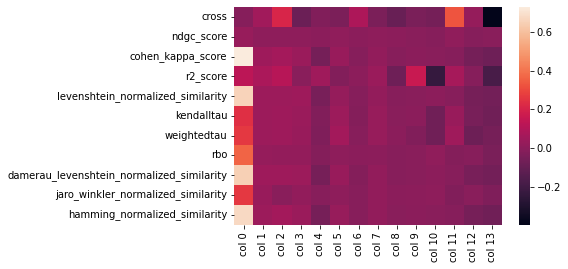

In [ ]:
tt = tt.astype(float)

sns.heatmap(tt, annot=False, fmt=".2f")

<AxesSubplot:>

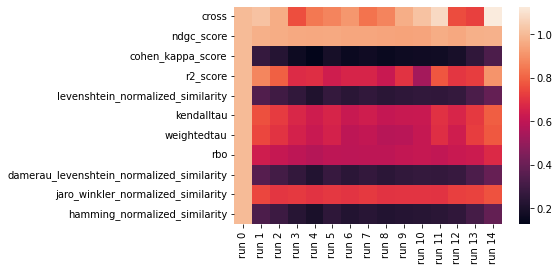

In [ ]:
xx = xx.astype(float)

sns.heatmap(xx, annot=False, fmt=".2f")

In [ ]:
create_scores_v2(r1,r2)["aggregated"]

{'ndgc_score': 0.9574173286146739,
 'cohen_kappa_score': 0.16666666666666652,
 'r2_score': 0.7693191699862705,
 'levenshtein_normalized_similarity': 0.25824175824175816,
 'kendalltau': 0.6739926739926737,
 'weightedtau': 0.649335294701584,
 'rbo': 0.6545696367124939,
 'damerau_levenshtein_normalized_similarity': 0.27472527472527475,
 'jaro_winkler_normalized_similarity': 0.7281966181966182,
 'hamming_normalized_similarity': 0.23076923076923075}

In [ ]:
xx

,run 0,run 1,run 2,run 3,run 4,run 5,run 6,run 7,run 8,run 9,run 10,run 11,run 12,run 13,run 14
cross,1.0,1.016801,0.962792,0.756016,0.842598,0.870042,0.914605,0.829515,0.872035,0.968783,1.016799,1.078166,0.752521,0.728798,1.125646
ndgc_score,1.0,0.971863,0.964949,0.957099,0.952876,0.955381,0.946658,0.949609,0.942422,0.939011,0.945983,0.963976,0.951738,0.969943,0.976197
cohen_kappa_score,1.0,0.269841,0.226190,0.164683,0.126984,0.186508,0.154762,0.168651,0.152778,0.162698,0.166667,0.172619,0.190476,0.251984,0.329365
r2_score,1.0,0.873190,0.791729,0.678258,0.684908,0.634486,0.658388,0.658286,0.622070,0.698111,0.535883,0.774201,0.707319,0.721286,0.906101
levenshtein_normalized_similarity,1.0,0.340659,0.298535,0.256410,0.212454,0.263736,0.239927,0.256410,0.238095,0.250916,0.256410,0.254579,0.267399,0.324176,0.386447
kendalltau,1.0,0.759463,0.716117,0.668498,0.632479,0.661172,0.617827,0.637973,0.608669,0.616606,0.619658,0.694139,0.662393,0.712454,0.786325
weightedtau,1.0,0.739919,0.699050,0.652392,0.619715,0.652999,0.594867,0.606072,0.576797,0.580639,0.611388,0.685381,0.637337,0.720324,0.777439
rbo,1.0,0.636736,0.613530,0.594003,0.573931,0.593611,0.589098,0.593472,0.592279,0.605179,0.612050,0.600198,0.620336,0.629961,0.674937
damerau_levenshtein_normalized_similarity,1.0,0.349817,0.304029,0.260073,0.217949,0.272894,0.241758,0.260073,0.243590,0.256410,0.263736,0.261905,0.272894,0.326007,0.391941
jaro_winkler_normalized_similarity,1.0,0.739575,0.706909,0.713083,0.697055,0.709346,0.702601,0.712862,0.698999,0.704022,0.703882,0.698182,0.725948,0.732865,0.765773


In [ ]:
viz_data=xx.T
viz_data.drop(columns=["hamming_normalized_similarity","levenshtein_normalized_similarity"],inplace=True)
viz_data.columns=["Cross","NDGC","Cohen k","R2","K tau","W K tau","RBO","DAME","JARO"]
s = viz_data.style
s.format(precision=2,na_rep="0")

tex=s.to_latex(column_format="l|r|r|r|r|r|r|r|r|r",multirow_align="t",position="h",hrules=True,convert_css=True,position_float="centering",label="tab:hyp", caption="Hypothesis testing of Distributed versus Centralised and local for every test.",)



In [ ]:
f = open("Viz/data.tex", "w")
f.write(tex)
f.close()

<AxesSubplot:>

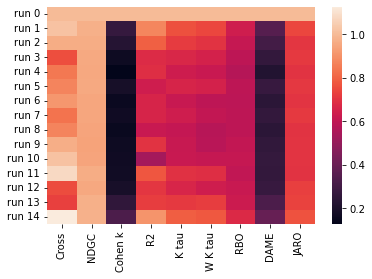

In [ ]:
xx = xx.astype(float)

sns.heatmap(viz_data, annot=False, fmt=".2f")

In [ ]:
viz_data=tt.T
viz_data.drop(columns=["hamming_normalized_similarity","levenshtein_normalized_similarity"],inplace=True)
viz_data.columns=["Cross","NDGC","Cohen k","R2","K tau","W K tau","RBO","DAME","JARO"]
s = viz_data.style
s.highlight_max(color="yellow",axis=1).highlight_min(color="orange",axis=1)
s.format(precision=2,na_rep="0")

tex=s.to_latex(column_format="l|r|r|r|r|r|r|r|r|r",multirow_align="t",position="h",hrules=True,convert_css=True,position_float="centering",label="tab:hyp", caption="Hypothesis testing of Distributed versus Centralised and local for every test.",)



In [ ]:
f = open("Viz/data_diff.tex", "w")
f.write(tex)
f.close()